## Week 2

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
from plotly import express as px
import plotly.graph_objects as go

### Excercise 1

In this excercise we will manually fit a linear regression model to given data

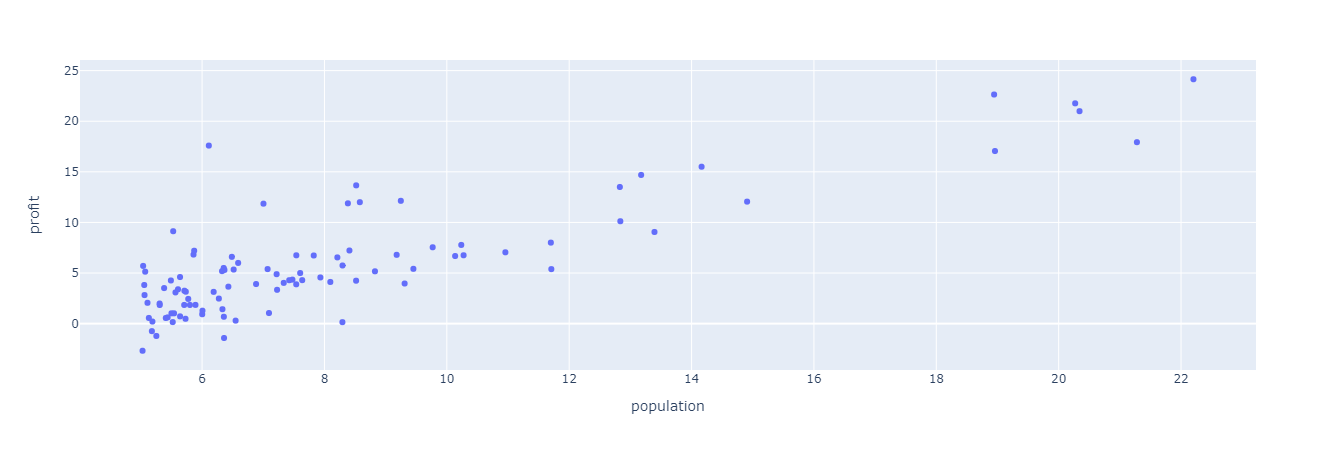

In [101]:
df = pd.read_csv("ex1data1.csv", names = ['population', 'profit'])
px.scatter(df,'population', 'profit')

The data seems to follow a linear trend, thus linear regression model would be a good aproximation for predicting the data

We will first implement it by hand, and then with a built in function

In [79]:
m = len(df)

In [80]:
x = df['population'] # training feature
y = df['profit'] # target

In [81]:
X = np.array([[1]*m,x]).T
y = np.array([y]).T
theta = np.zeros((2,1))

In [82]:
iterations = 1500
alpha = 0.01

In [83]:
def cost_function(X, y , theta):
    return (1 / (2*m)) * np.power(X@theta - y,2).sum()

In [84]:
cost_function(X,y,theta)

32.072733877455676

In [85]:
def gradient_descent(X, y, theta, learning_rate, iterations, cost_fun = cost_function):
    m = len(y)
    cost_history = []
    theta_history = []
    
    for i in range(iterations):
        
        error = X@theta - y
        theta  = theta - (1/m)*learning_rate*X.T@error
        
        cost_history.append( cost_function(X,y,theta) )
        theta_history.append(theta)
        
    return theta, cost_history, theta_history                                              

In [86]:
t,c_h,t_h = gradient_descent(X,y,theta,alpha,iterations)

In [128]:
prediction = x*t[1] + t[0]

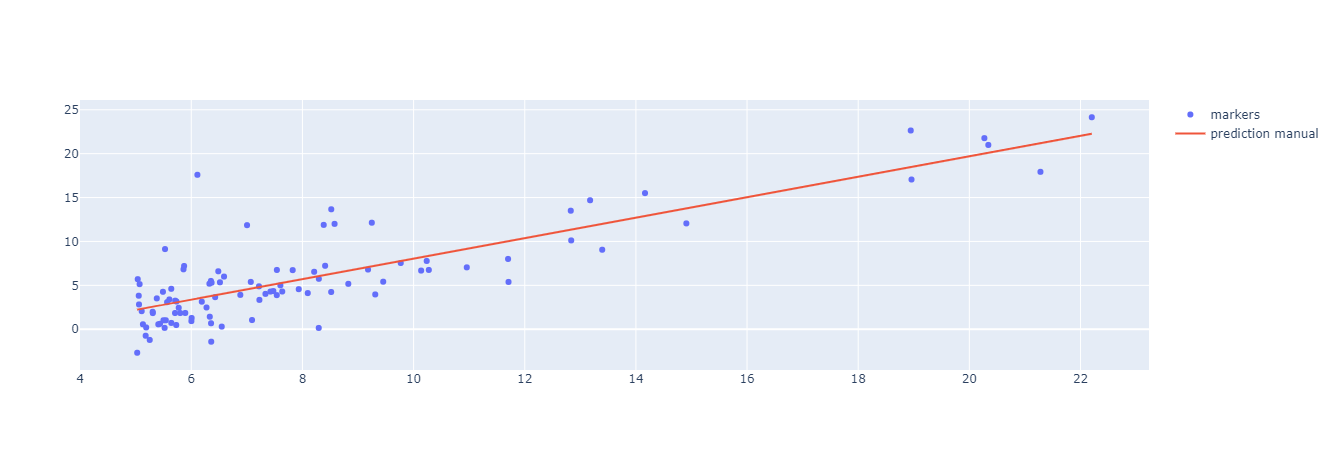

In [134]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y.T[0],
                    mode='markers',
                    name='markers'))
fig.add_trace(go.Scatter(x=x, y=prediction,
                    mode='lines',
                    name='prediction manual'))
